<a href="https://colab.research.google.com/github/Lesiazhou/QM2/blob/main/%E2%80%9CUPDATED_NDVI_salinity_%2B_water_volume%2C_water_characteristics_vs_NDVI%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ee
import pandas as pd
import numpy as np
from datetime import datetime

ee.Authenticate()
ee.Initialize(project='yokomultilinear')

In [ ]:
roi = ee.Geometry.Polygon([
    [
        [60.286329088587394, 47.05784753424885],
        [61.8734050779542, 46.717316850454495],
        [62.242492517342725, 46.04898165120849],
        [62.42703623703642, 45.6311486297343],
        [62.18712940143365, 45.229675811475516],
        [61.781133218107925, 44.67462786656117],
        [60.9506864794846, 43.9882091130184],
        [60.70155245789806, 43.22656261187322],
        [59.81988922233293, 42.42319084197277],
        [59.24030351715686, 42.34073789685709],
        [58.695063631546304, 42.48021021361154],
        [58.42029707501882, 42.92192144563498],
        [58.19275602039386, 43.23863233263961],
        [58.10514887171084, 43.69172846564163],
        [57.82224913104005, 44.462076648787814],
        [57.90985627972185, 44.98874927009652],
        [58.233328828697466, 45.61914032817458],
        [58.62419149204436, 46.11186668739606],
        [59.311510532225725, 46.59177711420847],
        [59.796719355690755, 46.77670032142652],
        [60.26845015628146, 47.04830692107981]
    ]
])

In [ ]:
modis = ee.ImageCollection('MODIS/006/MOD13Q1').filterBounds(roi)
avhrr = ee.ImageCollection('NOAA/CDR/AVHRR/NDVI/V5').filterBounds(roi).filterDate('1980-01-01', '1998-12-31')


/usr/local/lib/python3.10/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for MODIS/006/MOD13Q1! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MOD13Q1

  warnings.warn(warning, category=DeprecationWarning)


In [ ]:
def extract_pixel_ndvi(image):
    ndvi = image.select('NDVI')
    samples = ndvi.addBands(image.metadata('system:time_start','date')).sample(
        region=roi,
        scale=500,
        projection=ndvi.projection(),
        geometries=True
    )
    return samples

In [ ]:
data = []

In [ ]:
avhrr_ndvi = avhrr.map(lambda image: image.select('NDVI').multiply(0.0001))

Combining 2 datasets as there is no dataset with continuous data from 1980s till 2004 (dam built in 2005)

In [ ]:


ee.Authenticate()
ee.Initialize(project='yokomultilinear')



# AVHRR GAC NDVI dataset (1980-1998)
avhrr_ndvi = ee.ImageCollection('NOAA/CDR/AVHRR/NDVI/V5').filterBounds(roi)

# MODIS dataset (2000-2004)
modis_ndvi = ee.ImageCollection('MODIS/006/MOD13Q1').filterBounds(roi)

def extract_pixel_ndvi(image):
    ndvi = image.select('NDVI')
    samples = ndvi.addBands(image.metadata('system:time_start', 'date')).sample(
        region=roi,
        scale=5000,  # Adjust scale
        projection=ndvi.projection(),
        geometries=True
    )
    return samples

yearly_data = []

# Extract yearly average NDVI from AVHRR (1980-1999)
for year in range(1980, 2000):
    yearly_avhrr = avhrr_ndvi.filterDate(str(year) + '-01-01', str(year) + '-12-31')

    if yearly_avhrr.size().getInfo() > 0:
        # Mask fill values
        yearly_avhrr = yearly_avhrr.map(lambda image: image.updateMask(image.select('NDVI').neq(-32768)))

        # Calculate yearly average NDVI
        yearly_mean_ndvi = yearly_avhrr.mean().clip(roi).reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=roi,
            scale=5000
        ).get('NDVI')

        ndvi_value = yearly_mean_ndvi.getInfo()
        # Rescale AVHRR NDVI
        ndvi_value = (ndvi_value / 2550)

        # Optional: Filter outliers or extreme values here (using thresholds, IQR, etc.)

        yearly_data.append([year, ndvi_value, 'AVHRR'])
    else:
        print(f"No AVHRR images found for year {year}. Skipping...")

# Extract yearly average NDVI from MODIS (2000-2004)
for year in range(2000, 2005):
    yearly_modis = modis_ndvi.filterDate(str(year) + '-01-01', str(year) + '-12-31')

    if yearly_modis.size().getInfo() > 0:
        # Calculate yearly average NDVI
        yearly_mean_ndvi = yearly_modis.mean().clip(roi).reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=roi,
            scale=5000  # Adjust scale
        ).get('NDVI')

        ndvi_value = yearly_mean_ndvi.getInfo()
        # Rescale MODIS NDVI (original data is between 0 and 10000)
        ndvi_value = ndvi_value / 10000

        yearly_data.append([year, ndvi_value, 'MODIS'])
    else:
        print(f"No MODIS images found for year {year}. Skipping...")

# Create a pandas DataFrame
df = pd.DataFrame(yearly_data, columns=['year', 'ndvi', 'source'])

# Print the DataFrame
print(df)

No AVHRR images found for year 1980. Skipping...
    year      ndvi source
0   1981  0.456717  AVHRR
1   1982  0.302966  AVHRR
2   1983  0.313053  AVHRR
3   1984  0.301992  AVHRR
4   1985  0.317433  AVHRR
5   1986  0.285627  AVHRR
6   1987  0.310313  AVHRR
7   1988  0.311865  AVHRR
8   1989  0.253266  AVHRR
9   1990  0.300415  AVHRR
10  1991  0.317312  AVHRR
11  1992  0.305150  AVHRR
12  1993  0.320836  AVHRR
13  1994  0.344549  AVHRR
14  1995  0.364707  AVHRR
15  1996  0.337529  AVHRR
16  1997  0.385210  AVHRR
17  1998  0.360696  AVHRR
18  1999  0.366219  AVHRR
19  2000  0.076657  MODIS
20  2001  0.063584  MODIS
21  2002  0.091257  MODIS
22  2003  0.090325  MODIS
23  2004  0.095024  MODIS


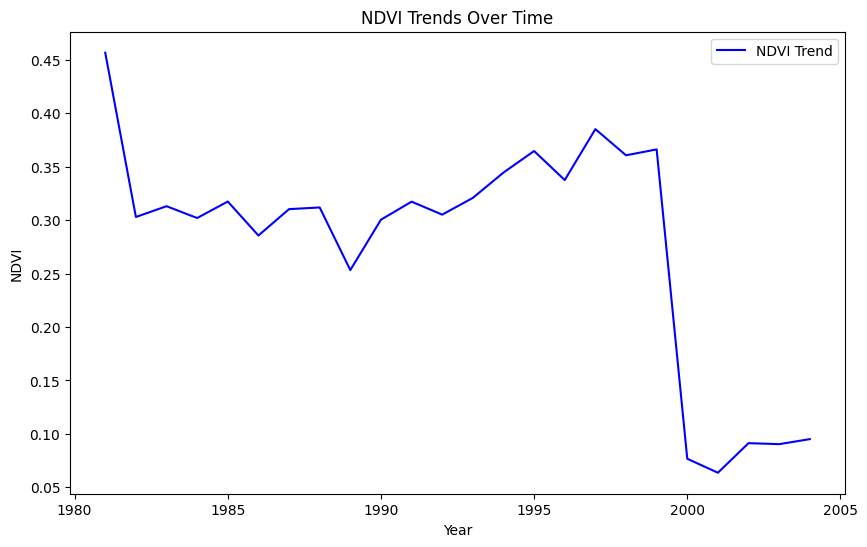

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot combined data with connected lines
ax.plot(df['year'], df['ndvi'], label='NDVI Trend', color='blue')  # Plot combined data

# Set plot title and labels
ax.set_title('NDVI Trends Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('NDVI')

# Add legend
ax.legend()

# Display the plot
plt.show()

Importing data for salinity (g/l) and water level(m)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving UPDATED_salinity.waterlevel.csv to UPDATED_salinity.waterlevel.csv


In [ ]:
df=pd.read_csv('UPDATED_salinity.waterlevel.csv')
df.head(10)

,Year,Salinity,Water Level,NDVI
0,1981,17.7,45.18,0.1160
1,1982,18.8,44.39,0.0770
2,1983,20.3,43.55,0.0799
3,1984,31.9,42.75,0.0770
4,1985,22.9,41.94,0.0810
5,1986,22.9,41.02,0.0720
6,1987,23.9,40.19,0.0790
7,1988,25.0,39.67,0.0790
8,1989,28.3,39.10,0.0640
9,1990,30.4,38.24,0.0770


In [ ]:
summary=df.describe()
summary=summary.T
summary

,count,mean,std,min,25%,50%,75%,max
Year,24.0,1992.500000,7.071068,1981.000,1986.7500,1992.500,1998.2500,2004.000
Salinity,24.0,39.337500,19.078164,17.700,24.7250,33.400,50.0000,86.300
Water Level,24.0,37.505833,4.188342,31.090,34.1525,37.075,40.3975,45.180
NDVI,24.0,0.083612,0.011404,0.063,0.0770,0.081,0.0910,0.116


NDVI = β0 + β1 * Salinity + β2 * Water_Level + ε

- NDVI: The dependent variable
- Salinity: The first predictor variable
- Water_Level: The second predictor variable
- β0: The intercept (the value of NDVI when salinity and water level are 0)
- β1: The coefficient for salinity (the change in NDVI for a unit change in salinity)
- β2: The coefficient for water level (the change in NDVI for a unit change in water level)
- ε: The error term (the difference between the observed and predicted NDVI values)

In [ ]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
Water_Level = df['Water Level']
model = ols('NDVI ~ Salinity + Water_Level', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.8497
Date:                Tue, 07 Jan 2025   Prob (F-statistic):              0.442
Time:                        20:48:23   Log-Likelihood:                 74.761
No. Observations:                  24   AIC:                            -143.5
Df Residuals:                      21   BIC:                            -140.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0270      0.058      0.469      

# **Aral sea morphometric characteristics---water volume + water surface area + water volume (1981-2004) vs NDVI**

# Introduction to the Aral Sea Dataset

This dataset provides detailed information about the Aral Sea from 1981 to 2004, capturing key characteristics such as water level (measured in meters), water surface area (in thousand square kilometers), and water volume (in cubic kilometers). The dataset offers insights into the significant environmental changes that occurred during this period, particularly the shrinking of the Aral Sea.

From 1986 onwards, the Aral Sea split into two distinct parts: the Southern Aral Sea (Big Aral) and the Northern Aral Sea (North Sea). To account for this division:

The water surface area and water volume from 1986 to 2004 represent the combined totals of the Big Aral and North Sea.
The water level values for this period have been averaged between the two seas to provide a unified representation of the Aral Sea's state.
This dataset reflects the drastic ecological changes in the region and can be used for analyzing the causes and impacts of the Aral Sea's transformation, such as desertification, water resource management, and regional agricultural productivity.

# 1. Summary Statistics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Aral_Sea_Characteristics__1981-2004_.csv to Aral_Sea_Characteristics__1981-2004_.csv


In [ ]:
import ee
import pandas as pd
import numpy as np
from datetime import datetime
df1=pd.read_csv('Aral_Sea_Characteristics__1981-2004_.csv')
df1.head(10)

,Year,Water Level (m),Water Surface Area (thousand km²),Water Volume (km³)
0,1981,45.18,48.63,625.78
1,1982,44.39,47.13,578.65
2,1983,43.55,46.07,532.58
3,1984,42.75,44.92,487.66
4,1985,41.94,43.08,444.58
5,1986,40.96,41.39,403.10
6,1987,40.49,39.94,365.56
7,1988,40.08,38.93,334.49
8,1989,39.65,38.01,327.20
9,1990,39.37,36.42,302.28


In [ ]:
summary=df1.describe()
summary=summary.T
summary

,count,mean,std,min,25%,50%,75%,max
Year,24.0,1992.500000,7.071068,1981.00,1986.7500,1992.50,1998.2500,2004.00
Water Level (m),24.0,39.199167,2.806499,35.39,37.6550,38.60,40.6075,45.18
Water Surface Area (thousand km²),24.0,34.185000,8.699316,19.21,28.2950,34.27,40.3025,48.63
Water Volume (km³),24.0,296.593750,148.734923,115.85,186.5075,255.29,374.9450,625.78


# 2. Visualisation

<Figure size 1200x600 with 0 Axes>

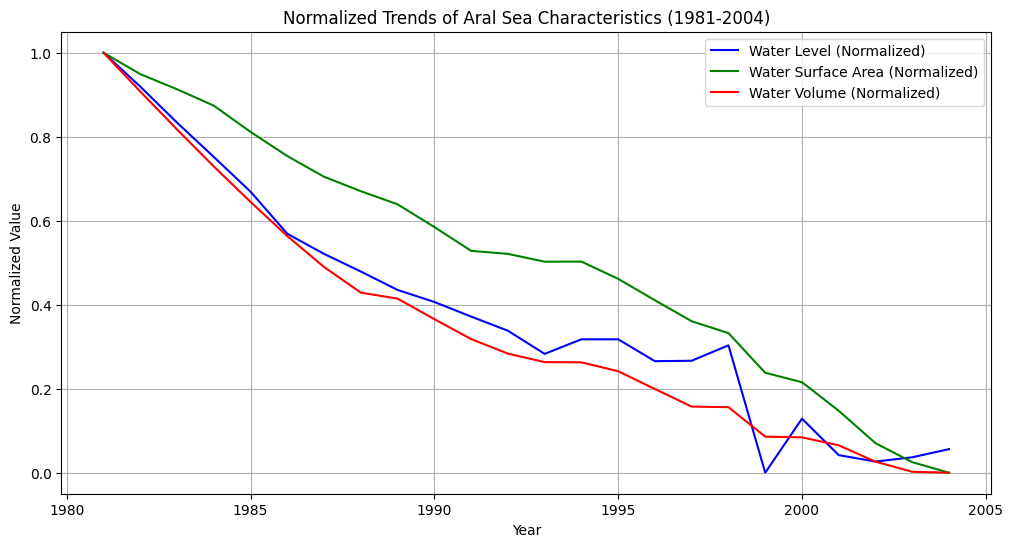

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

normalized_df = df1.copy()
for column in ["Water Level (m)", "Water Surface Area (thousand km²)", "Water Volume (km³)"]:
    normalized_df[column] = (df1[column] - df1[column].min()) / (df1[column].max() - df1[column].min())

plt.figure(figsize=(12, 6))
plt.plot(normalized_df["Year"], normalized_df["Water Level (m)"], label="Water Level (Normalized)", color="blue")
plt.plot(normalized_df["Year"], normalized_df["Water Surface Area (thousand km²)"], label="Water Surface Area (Normalized)", color="green")
plt.plot(normalized_df["Year"], normalized_df["Water Volume (km³)"], label="Water Volume (Normalized)", color="red")

plt.legend()
plt.title("Normalized Trends of Aral Sea Characteristics (1981-2004)")
plt.xlabel("Year")
plt.ylabel("Normalized Value")
plt.grid(True)
plt.show()

# 3. Assumption

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Year_NDVI.csv to Year_NDVI.csv


In [ ]:
ndvi_df = pd.read_csv('Year_NDVI.csv')
ndvi_df.rename(columns={'year': 'Year'}, inplace=True)
merged_df = pd.merge(df1, ndvi_df, on="Year")
merged_df

,Year,Water Level (m),Water Surface Area (thousand km²),Water Volume (km³),ndvi
0,1981,45.18,48.63,625.78,0.456717
1,1982,44.39,47.13,578.65,0.302966
2,1983,43.55,46.07,532.58,0.313053
3,1984,42.75,44.92,487.66,0.301992
4,1985,41.94,43.08,444.58,0.317433
5,1986,40.96,41.39,403.10,0.285627
6,1987,40.49,39.94,365.56,0.310313
7,1988,40.08,38.93,334.49,0.311865
8,1989,39.65,38.01,327.20,0.253266
9,1990,39.37,36.42,302.28,0.300415


# A. Independence


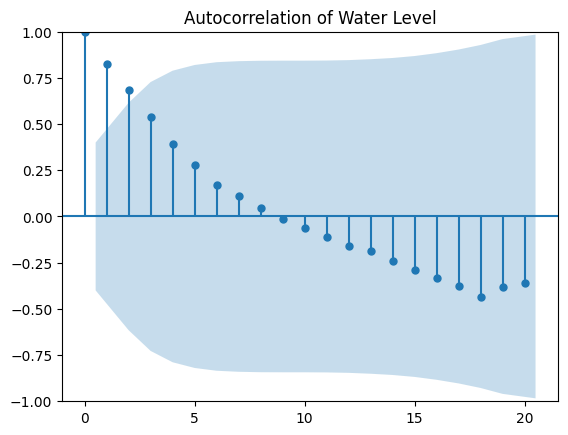

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(merged_df['Water Level (m)'], lags=20)
plt.title('Autocorrelation of Water Level')
plt.show()

Since the data is arranged in a time series format, it inherently lacks independence.Observations at one time point are likely influenced by those from preceding or subsequent time points. This is confirmed by the autocorrelation plot for Water Level, which shows significant positive autocorrelation at early lags, indicating strong temporal dependence.

# B. Homoscedasticity

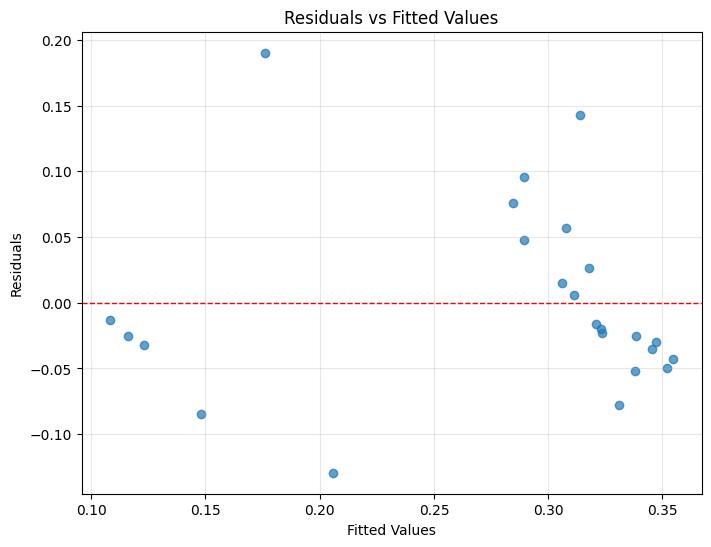

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = merged_df[['Water Level (m)', 'Water Surface Area (thousand km²)', 'Water Volume (km³)']]
y = merged_df['ndvi']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(alpha=0.3)
plt.show()

Plot Analyzed: Residuals vs. Fitted Values
The residual plot shows a potential pattern where residuals are not randomly distributed around zero. Specifically, the variance of residuals appears to change across different fitted values, with a concentration of smaller residuals at higher fitted values. This suggests heteroscedasticity, where the assumption of constant variance (homoscedasticity) is violated.

## **Implication:**

The homoscedasticity assumption is not satisfied.
This violation could affect the accuracy of significance tests and standard errors. Using robust standard errors or a log transformation might stabilize the variance and address this issue.

# C. Multicollinearity

In [ ]:
corr_matrix = merged_df[['Water Level (m)', 'Water Surface Area (thousand km²)', 'Water Volume (km³)']].corr()
print(corr_matrix)

                                   Water Level (m)  \
Water Level (m)                           1.000000   
Water Surface Area (thousand km²)         0.962669   
Water Volume (km³)                        0.988287   

                                   Water Surface Area (thousand km²)  \
Water Level (m)                                             0.962669   
Water Surface Area (thousand km²)                           1.000000   
Water Volume (km³)                                          0.960791   

                                   Water Volume (km³)  
Water Level (m)                              0.988287  
Water Surface Area (thousand km²)            0.960791  
Water Volume (km³)                           1.000000  


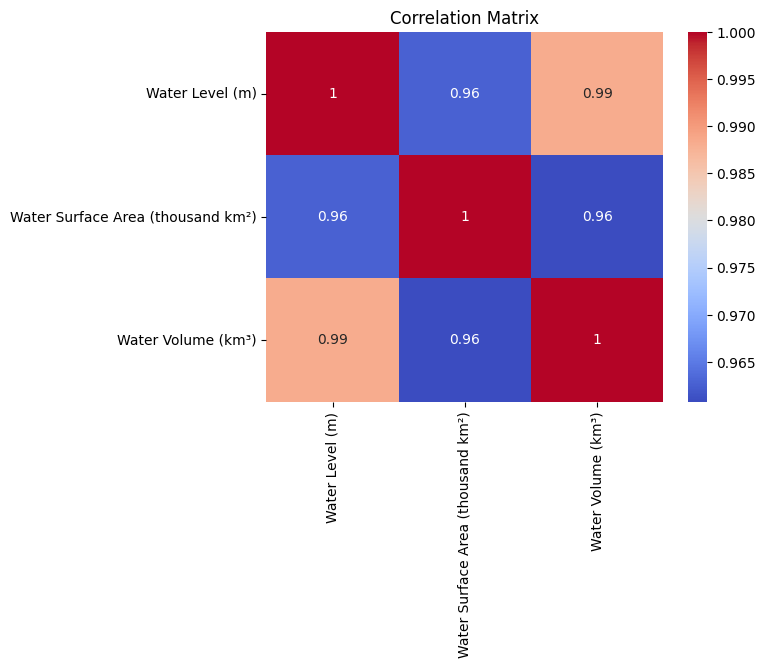

In [ ]:
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

This indicates severe multicollinearity, meaning the three predictors are highly interdependent. This violates the multicollinearity assumption and could lead to unstable regression coefficients and inflated standard errors.

# 4. Regression

To address the issues in our regression model, we applied a log transformation to the independent variables. Log transformation helps in two ways:

It reduces **multicollinearity** indirectly by linearizing nonlinear relationships (e.g., exponential or multiplicative relationships) and compressing the scale of variables.
It stabilizes variance, making the data more consistent with the homoscedasticity assumption.

However, log transformation does not directly address the lack of independence in time-series data. To handle this issue,additional steps such as **panel regression** can be applied. Panel regression effectively controls for unobserved individual heterogeneity and time trends by incorporating fixed or random effects. This helps reduce the impact of interdependence between observations across time or entities, making the model results more reliable and interpretable.



NDVI = β0 + β1 * water_level + β2 * water_surface_area + β3 * water_volume + ε

*   NDVI: The dependent variable
*   log（water_level）: The first predictor variable
*   log（water_surface_area）: The second predictor variable
*   log（water_volume）:  The third predictor variable


*   β0: The intercept (the value of NDVI when all factors are 0)
*   β1: The coefficient for water levl (the change in NDVI for a unit change in salinity)
*   β2: The coefficient for water surface area (the change in NDVI for a unit change in water level)
*   β3: The coefficient for water volume
*   ε: The error term (the difference between the observed and predicted NDVI values)



In [ ]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import numpy as np

merged_df['log_water_level'] = np.log(merged_df['Water Level (m)'])
merged_df['log_water_surface_area'] = np.log(merged_df['Water Surface Area (thousand km²)'])
merged_df['log_water_volume'] = np.log(merged_df['Water Volume (km³)'])

NDVI=merged_df['ndvi']
model = ols('ndvi ~ log_water_level + log_water_surface_area + log_water_volume', data=merged_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   ndvi   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     14.35
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           3.22e-05
Time:                        22:30:13   Log-Likelihood:                 33.347
No. Observations:                  24   AIC:                            -58.69
Df Residuals:                      20   BIC:                            -53.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -7

# **Results**

The OLS results indicate that **log_water_surface_area has a significant positive effect on NDVI** (p = 0.000), while **log_water_volume has a significant negative effect **(p = 0.007). In contrast, l**og_water_level is not statistically significant** (p = 0.077), and the intercept also shows marginal significance (p = 0.043). The model explains 68.3% of the variance in NDVI (R² = 0.683), **and the overall model is highly significant (F-statistic p = 3.22e-05)**.

However, the condition number (2.15e+03) suggests the **presence of multicollinearity or other numerical issues** that may affect the stability of the coefficients.